# LBNL

LBNL Provides us with 29 data points (mostly sensor readings) inside of the FCU. For this datapoints, 49 scenarios are given: 48 contain different types of potential faults in the system, and one of them "FCU_FaultFree.csv" contains no faults, representing normal data.
EDA will be performed over the fault free data, which is going to be the most generalizable for the rest of the scenarios

In [39]:
import pandas as pd

scenario = pd.read_csv(r"D:\Master\Thesis\Code\LBNL_FDD_Dataset_FCU\FCU_FaultFree.csv")
scenario

,Datetime,FCU_CTRL,FAN_CTRL,RM_TEMP,RMCLGSPT,RMHTGSPT,FCU_MAT,FCU_DAT,FCU_RAT,FCU_CVLV,...,FCU_OA_CFM,FCU_DMPR,FCU_DMPR_DM,FCU_SPD,FCU_OAT,FCU_WAT,FCU_MA_HUMD,FCU_OA_HUMD,FCU_DA_HUMD,FCU_RA_HUMD
0,01/01/2018 00:00,2,1,73.84,85.0,55.0,49.94,73.90,73.84,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
1,01/01/2018 00:01,2,1,73.84,85.0,55.0,49.94,73.90,73.84,0.0,...,0.88,0.0,0.0,0.0,26.05,0.0,58.78,56.03,41.31,41.39
2,01/01/2018 00:02,2,1,73.63,85.0,55.0,49.83,73.71,73.63,0.0,...,0.88,0.0,0.0,0.0,26.03,0.0,58.97,56.07,41.57,41.65
3,01/01/2018 00:03,2,1,73.43,85.0,55.0,49.72,73.51,73.43,0.0,...,0.88,0.0,0.0,0.0,26.02,0.0,59.15,56.10,41.84,41.91
4,01/01/2018 00:04,2,1,73.25,85.0,55.0,49.63,73.30,73.25,0.0,...,0.88,0.0,0.0,0.0,26.00,0.0,59.32,56.14,42.12,42.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,12/31/2018 23:55,2,1,60.21,85.0,55.0,33.85,51.86,60.21,0.0,...,0.88,0.0,0.0,0.0,7.49,0.0,100.00,54.91,89.80,59.13
525596,12/31/2018 23:56,2,1,60.21,85.0,55.0,33.80,51.82,60.21,0.0,...,0.88,0.0,0.0,0.0,7.40,0.0,100.00,54.92,89.95,59.14
525597,12/31/2018 23:57,2,1,60.20,85.0,55.0,33.75,51.77,60.20,0.0,...,0.88,0.0,0.0,0.0,7.31,0.0,100.00,54.93,90.11,59.15
525598,12/31/2018 23:58,2,1,60.19,85.0,55.0,33.70,51.73,60.19,0.0,...,0.88,0.0,0.0,0.0,7.22,0.0,100.00,54.94,90.26,59.16


In [40]:
# No missing values
scenario.isna().sum().sum()

0

In [ ]:
# 29 DataPoints + DateTime
len(scenario.columns)

30

In [41]:
# 365 days of data, with 1 minute time-step
scenario_dates = scenario.copy()
scenario_dates['Datetime'] = pd.to_datetime(scenario_dates['Datetime'])
# Get the range of days (minimum and maximum)
min_date = scenario_dates['Datetime'].min()
max_date = scenario_dates['Datetime'].max()

# Count the unique days
unique_days = scenario_dates['Datetime'].dt.date.nunique()
unique_days

365

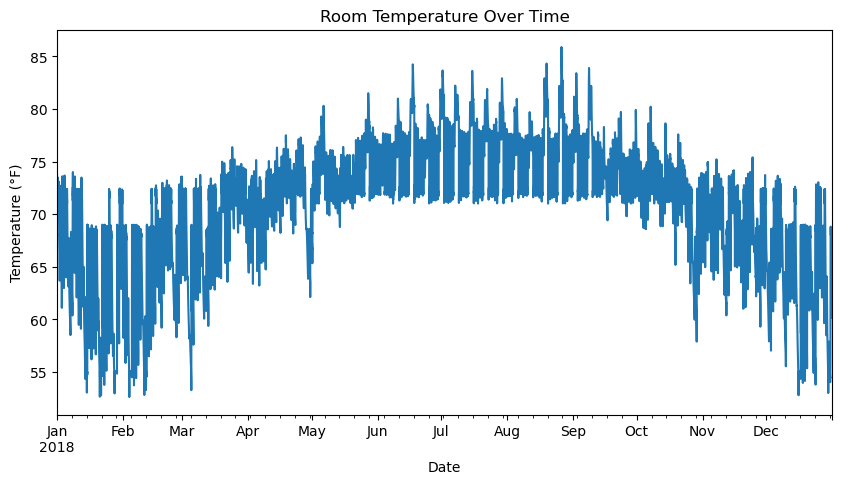

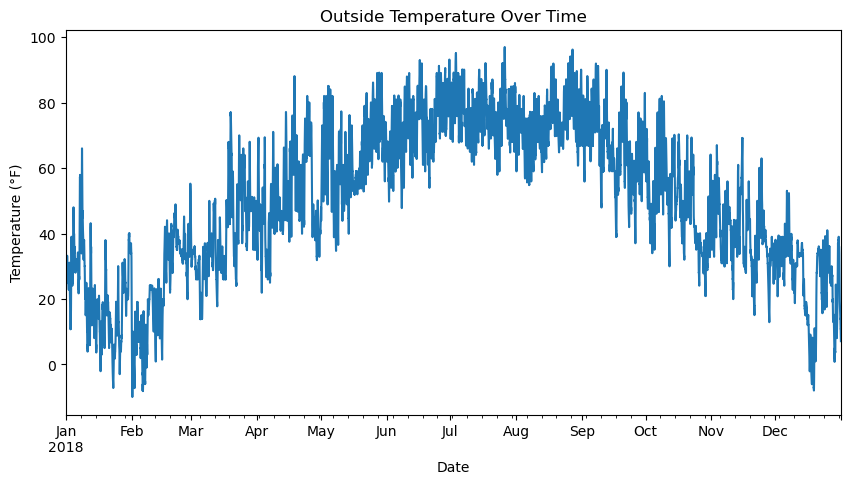

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of room temperature over the whole year
scenario_dates.set_index('Datetime')['RM_TEMP'].plot(figsize=(10, 5))
plt.title("Room Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()

# Visualization of outside temperature over the whole year
scenario_dates.set_index('Datetime')['FCU_OAT'].plot(figsize=(10, 5))
plt.title("Outside Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.show()

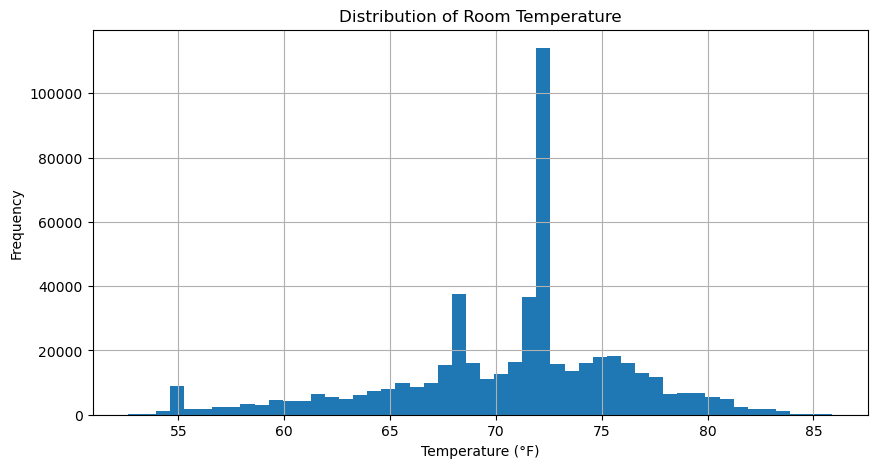

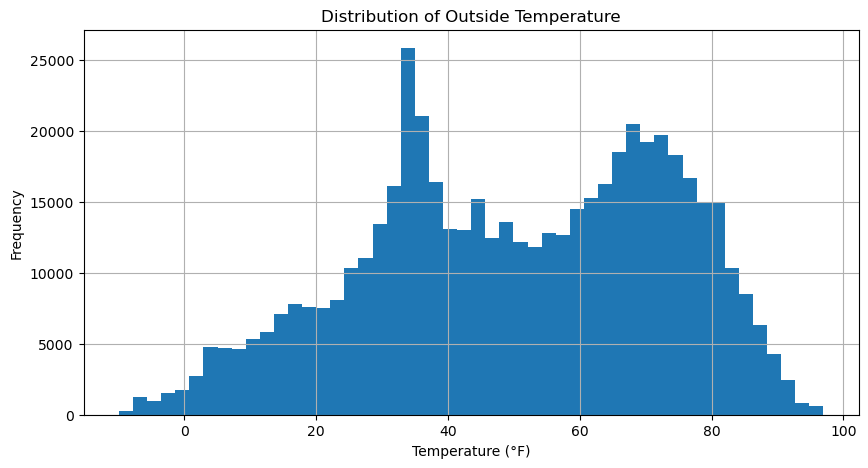

In [53]:
# Histogram for visualizing frequency distribution of inside room temperature
scenario_dates['RM_TEMP'].hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Room Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

# Histogram for visualizing frequency distribution of outside temperature
scenario_dates['FCU_OAT'].hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Outside Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

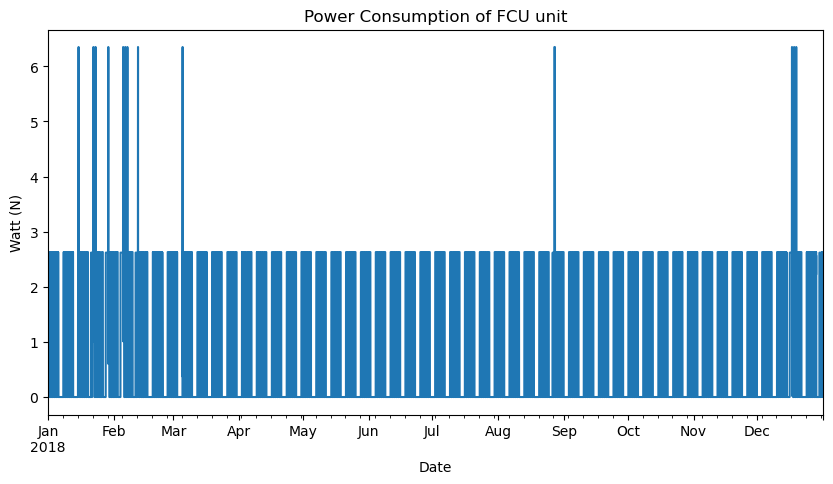

In [54]:
# Visualization of power consumption of FCU unit
scenario_dates.set_index('Datetime')['FCU_WAT'].plot(figsize=(10, 5))
plt.title("Power Consumption of FCU unit")
plt.xlabel("Date")
plt.ylabel("Watt (N)")
plt.show()

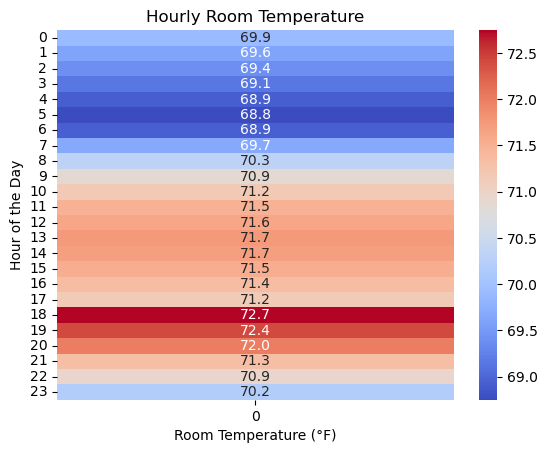

In [60]:
# Average hourly temperature
scenario_dates['hour'] = scenario_dates['Datetime'].dt.hour
hourly_avg_temp = scenario_dates.groupby('hour')['RM_TEMP'].mean()

sns.heatmap(hourly_avg_temp.values.reshape(24, 1), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Hourly Room Temperature")
plt.ylabel("Hour of the Day")
plt.xlabel("Room Temperature (°F)")
plt.show()

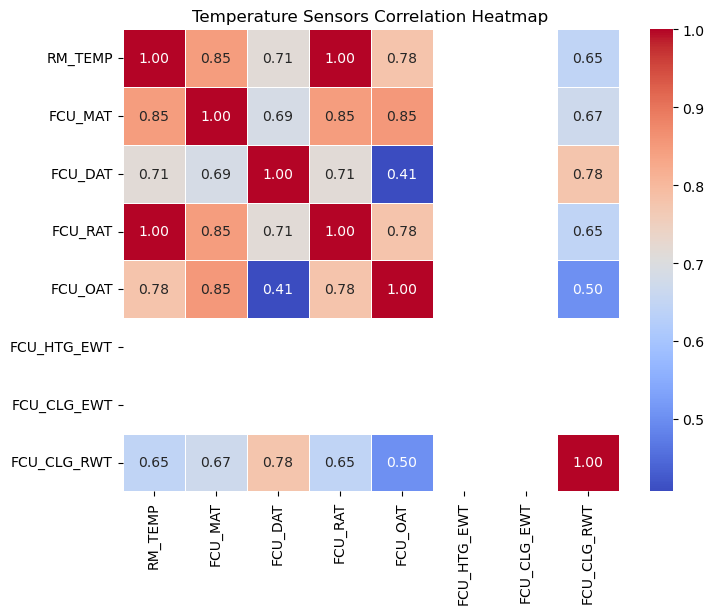

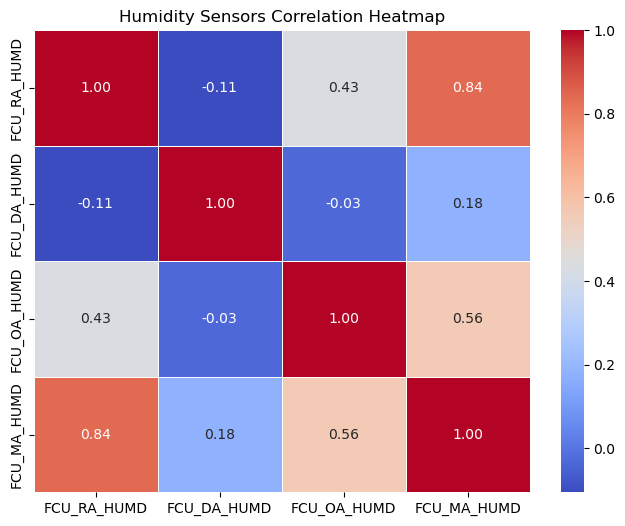

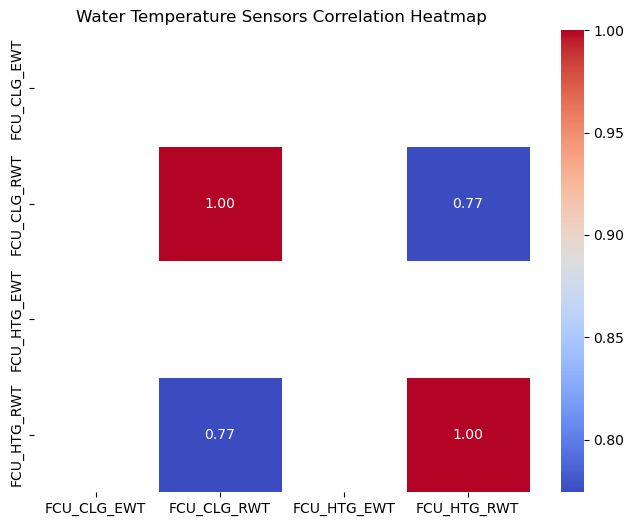

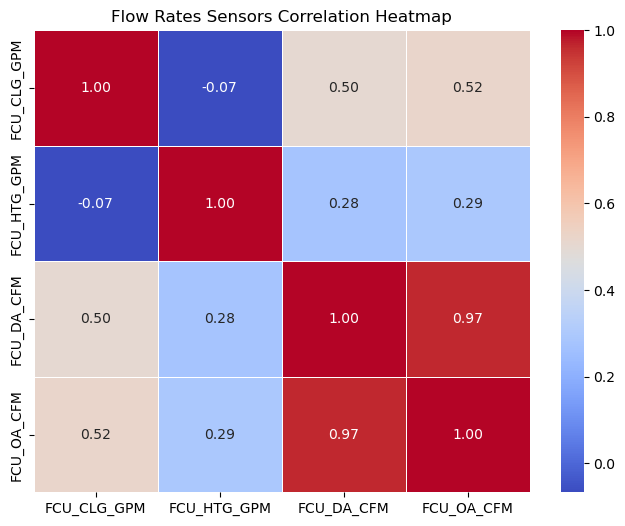

In [65]:
# Create separate heatmaps for different groups of sensors (example)
temp_sensors = ['RM_TEMP', 'FCU_MAT', 'FCU_DAT', 'FCU_RAT', 'FCU_OAT', 'FCU_HTG_EWT', 'FCU_CLG_EWT', 'FCU_CLG_RWT']
humidity_sensors = ['FCU_RA_HUMD', 'FCU_DA_HUMD', 'FCU_OA_HUMD', 'FCU_MA_HUMD']
water_temp_sensors = ['FCU_CLG_EWT', 'FCU_CLG_RWT', 'FCU_HTG_EWT', 'FCU_HTG_RWT']  # HTG_EWT and CLG_EWT have always constant values, thus appear empty in correlation matrix
flow_rates_sensors = ['FCU_CLG_GPM', 'FCU_HTG_GPM', 'FCU_DA_CFM', 'FCU_OA_CFM']

# Temperature sensors correlation heatmap
temp_corr = scenario_dates[temp_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Temperature Sensors Correlation Heatmap")
plt.show()

# Humidity sensors correlation heatmap
humidity_corr = scenario_dates[humidity_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(humidity_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Humidity Sensors Correlation Heatmap")
plt.show()

# Water temperature sensors correlation heatmap
water_temp_corr = scenario_dates[water_temp_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(water_temp_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Water Temperature Sensors Correlation Heatmap")
plt.show()

# Flow rates sensors correlation heatmap
flow_rates_corr = scenario_dates[flow_rates_sensors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(flow_rates_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Flow Rates Sensors Correlation Heatmap")
plt.show()